In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
# --- Physical constants ---
g = 9.80665 # gravitational acceleration, approx 9.81 m s^{-2}
Omega = 7.292115 * 10**(-5)  # Earth's angular velocity, rad/s

In [3]:
# grid spacing
Delta_x = 500 # meters (east-west)
Delta_y = Delta_x # (north-south)

# time step
Delta_t = 0.05 # seconds

# # Old Code - Large scale 

# # grid spacing
# Delta_x = 10**5 # meters (east-west)
# Delta_y = Delta_x # (north-south)

# # time step
# Delta_t = 60 # seconds

In [4]:
num_x = 451 # number of east-west grid points
num_y = 501 # number of north-south grid points
num_t = 20000 # number of time steps

# # Old Code
# num_x = 254 # number of east-west grid points
# num_y = 50 # number of north-south grid points
# num_t = 720 # number of time steps

In [5]:
print(f"Total east-west distance: { Delta_x * (num_x - 1) } meters")
print(f"Total north-south distance: { Delta_y * (num_y - 1) } meters")

Total east-west distance: 225000 meters
Total north-south distance: 250000 meters


In [6]:
# for plotting
x = np.arange(0, num_x) * Delta_x # x nodes
y = np.arange(0, num_y) * Delta_y # y nodes
X, Y = np.meshgrid(x, y, indexing='ij')

In [7]:
# eta =  7 * np.exp(-((X-70000))**2)
# smooth_south = np.where(Y <= 40000, np.exp(-((Y - 40000)/15000)**2), 1.0) # smooth the southern boundary
# smooth_north = np.where(Y >= 210000, np.exp(-((Y - 210000)/15000)**2), 1.0) # smooth the northern boundary
# eta = eta * smooth_south * smooth_north # eta = sea level

sigma_x = 15000  # Width in X-direction
sigma_y = 15000
eta = 7 * np.exp(-((X - 70000)**2 / (2 * sigma_x**2) + (Y - 125000)**2 / (2 * sigma_y**2)))

# # # Old code
# # --- Initial height with Gaussian pulse ---
# std_pulse = 8.0 * Delta_y
# mean_x = np.mean(x)  # Center of the domain (east-west)
# mean_y = np.mean(y)  # Center of the domain (north-south)
# eta = 3500.0 + 300.0 * np.exp(-((X - 0.25 * mean_x)**2 + (Y - .3 * mean_y)**2) / (2.0 * std_pulse**2)) # eta = upper surface




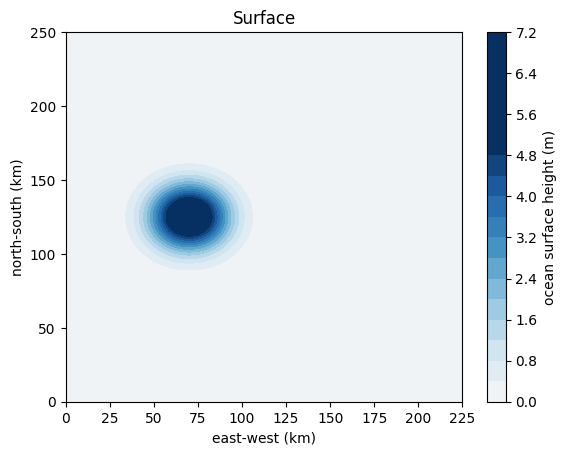

In [8]:
vmin = -5
vmax = 5
contour = plt.contourf(X / 1000, Y / 1000, eta, levels=20, cmap='RdBu', vmin=vmin, vmax=vmax)
plt.colorbar(contour, label='ocean surface height (m)')
plt.xlabel('east-west (km)')
plt.ylabel('north-south (km)')
#plt.xlim(65, 75)
plt.title("Surface")
plt.show()

# # Old Code 

# plt.figure(figsize=(12, 6))

# # Contour plot of height field
# contour = plt.contourf(X/1000, Y/1000, eta, levels=20, cmap='viridis')  # Convert to km for axes
# plt.colorbar(contour, label='Height (m)')

# # Mark the center of the pulse
# pulse_center_x = 0.25 * np.mean(x)
# pulse_center_y = np.mean(y)
# plt.scatter(pulse_center_x/1000, pulse_center_y/1000, c='red', s=50, label='Pulse Center')

# # Annotations and labels
# plt.xlabel('East-West Distance (km)')
# plt.ylabel('North-South Distance (km)')
# plt.title(f'Initial Height Field with Gaussian Pulse\n(Peak: {eta.max():.1f} m, Center at {pulse_center_x/1000:.1f} km E-W)')
# plt.legend()
# plt.grid(True, alpha=0.3)

# # Add scale annotation
# plt.text(0.02, 0.95, f'Pulse width (σ): {std_pulse/1000:.1f} km', 
#          transform=plt.gca().transAxes, backgroundcolor='white')

# plt.tight_layout()
# plt.show()

In [9]:
print('x-coordinate varies along rows')
print(X) # x varies along rows
print("\ny-coordinate varies along columns") 
print(Y) # y varies along columns
# thus eta(x, y) = eta[x, y], i.e., mathematical function notation and computer matrix notation coincide.
# (if we had x vary along columns, and y vary along rows, then eta(x, y) = eta[y, x], which is annoying to code.)

x-coordinate varies along rows
[[     0      0      0 ...      0      0      0]
 [   500    500    500 ...    500    500    500]
 [  1000   1000   1000 ...   1000   1000   1000]
 ...
 [224000 224000 224000 ... 224000 224000 224000]
 [224500 224500 224500 ... 224500 224500 224500]
 [225000 225000 225000 ... 225000 225000 225000]]

y-coordinate varies along columns
[[     0    500   1000 ... 249000 249500 250000]
 [     0    500   1000 ... 249000 249500 250000]
 [     0    500   1000 ... 249000 249500 250000]
 ...
 [     0    500   1000 ... 249000 249500 250000]
 [     0    500   1000 ... 249000 249500 250000]
 [     0    500   1000 ... 249000 249500 250000]]


In [10]:
b = np.zeros((num_x, num_y)) - 500 # flat sea floor

# tsunami attempt
# b = np.where(X <= 70000, -.014 * X, -987)
# b = np.where(X<50000, -.0025 * X, 0)
# b += np.where((X >= 50000) & (X < 60000), 2375 -.05 * X, 0)
# b += np.where((X >= 60000) & (X<=70000), 1697 - .0387 * X, 0)
# b += np.where(X>70000, -1012, 0)

# using old scaling
# b = np.zeros((num_x, num_y)) # flat sea floor


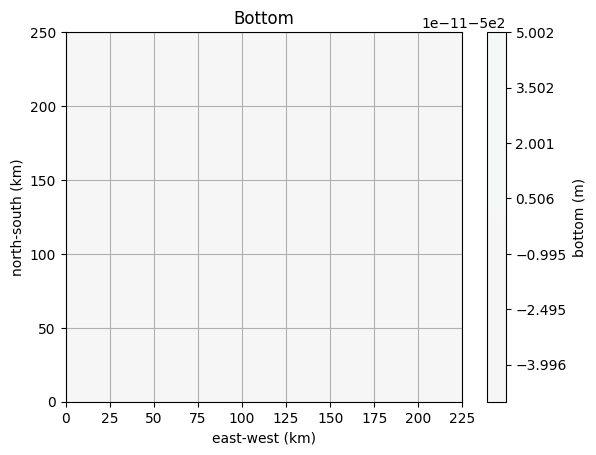

In [11]:
contour = plt.contourf(X / 1000, Y / 1000, b, cmap='RdBu', levels=20, vmin = -1000, vmax = 0)
plt.colorbar(contour, label='bottom (m)')
plt.xlabel('east-west (km)')
plt.ylabel('north-south (km)')
plt.grid(True)
plt.title("Bottom")
plt.show()

In [12]:
# --- Coriolis Force ---
f = np.zeros((num_x, num_y)) 

# beta plane approximation
latitude = 45 # degrees North
f_0 = 2 * Omega * np.sin(np.radians(latitude))
beta = 1e-10
f = f_0 + beta * (Y-np.mean(y))

In [13]:
# initialize velocity field
u = np.zeros((num_x, num_y)) # meters per second
v = np.zeros((num_x, num_y))

In [14]:
add_noise = False

if add_noise:
    eta += np.random.random(eta.shape) - 0.5
    u += np.random.random(u.shape) - 0.5 
    v += + np.random.random(v.shape) - 0.5
    b += np.random.random(b.shape) - 0.5

In [15]:
h = eta - b

In [16]:
import finite_vol as fv

In [17]:
n_output = 500 # plot every n_output timesteps
i = 0 # name the plot

In [18]:
for n in range(0, num_t):
    #sources
    S_u = f[1:-1, 1:-1] * v[1:-1, 1:-1] - g * (b[2:,1:-1] - b[0:-2,1:-1]) / (2 * Delta_x)
    S_v = -f[1:-1, 1:-1] * u[1:-1, 1:-1] - g * (b[1:-1,2:] - b[1:-1,0:-2]) / (2 * Delta_y)

    (unew, vnew, h_new) = fv.finite_vol(Delta_x, Delta_y, Delta_t, g, u, v, h, S_u, S_v)
    u[1:-1, 1:-1] = unew
    v[1:-1, 1:-1] = vnew
    h[1:-1, 1:-1] = h_new

    if np.mod(n, n_output) == 0:
        eta = b + h #update surface

        #plotting surface
        vmin = -5
        vmax = 5
        contour = plt.contourf(X / 1000, Y / 1000, eta, levels=20, cmap='RdBu', vmin=vmin, vmax=vmax)
        plt.colorbar(contour, label='ocean surface height (m)')
        plt.xlabel('east-west (km)')
        plt.ylabel('north-south (km)')
        plt.title(f'surface after {Delta_t * n} seconds')
        plt.grid(True)

        # Save the figure
        plt.savefig(f'surface_{i}.png', dpi=150, bbox_inches='tight')
        plt.close()  # Prevents memory overload
        i += 1

        # OLD CODE
        # # =====================================
        # # Plot perturbation height from a reference level
        # # =====================================

        # max_u = np.sqrt(np.max(u**2 + v**2)) 

        # plt.figure(figsize=(12, 6))
        # eta = b + h  # free surface height
        
        # # Contour plot
        # vmin = -100  # Minimum color height
        # vmax = 100   # Maximum color height

        # contour = plt.contourf(
        #         X/1000, Y/1000, eta - 3500, 
        #         levels=20, cmap='RdBu', 
        #         vmin=vmin, vmax=vmax  # Fix color scale
        # )
        # plt.colorbar(contour, label='Perturbation height (m)')
        
        # # Add quiver plot for velocity (optional)
        # quiver_step = 5  # Plot every 5th arrow for clarity
        # plt.quiver(X[::quiver_step, ::quiver_step]/1000, 
        #            Y[::quiver_step, ::quiver_step]/1000,
        #            u[::quiver_step, ::quiver_step],
        #            v[::quiver_step, ::quiver_step],
        #            scale=100, color='black')

        # # Annotations
        # plt.xlabel('East-West Distance (km)')
        # plt.ylabel('North-South Distance (km)')
        # plt.title(f'Perturbation Height at t = {n*Delta_t/3600.:.2f} hours\nMax velocity = {max_u:.2f} m/s')
        # plt.grid(True, alpha=0.3)
        
        # # Save the figure (optional)
        # plt.savefig(f'perturbation_height_{n:03d}.png', dpi=150, bbox_inches='tight')
        # plt.close()  # Prevents memory overload


    # boundary conditions    

    # # first x-slice
    # u[0, 1:-1] = unew[-1, :]
    # u[0, 0] = unew[-1, 0]
    # u[0, -1] = unew[-1, -1]
    # v[0, 1:-1] = vnew[-1, :]
    # v[0, 0] = vnew[-1, 0]
    # v[0, -1] = vnew[-1, -1]
    # # last x-slice
    # u[-1, 1:-1] = unew[1, :]
    # u[-1 ,0] = unew[1, 0]
    # u[-1, -1] = unew[1, -1]
    # v[-1, 1:-1] = vnew[1, :]
    # v[-1, 0] = vnew[1, 0]
    # v[-1, -1] = vnew[1, -1]

    # # # first y-slice
    # # u[1:-2, 0] = unew[0:-1, -1]
    # # v[1:-2, 0] = vnew[0:-1, -1]

    # # #last y-slice
    # # u[1:-2, -1] = unew[0:-1, 0]
    # # v[1:-2, -1] = vnew[0:-1, 0]

    # # no flux from north / south
    # v[:,[0,-1]]=0.
    
    # # first x-slice
    # h[0,1:-1]=h_new[-1,:]
    # # last x-slice
    # h[-1,1:-1]=h_new[1,:]

    # #first y-slice
    # h[1:-2, 0] = h_new[0:-1, -1]
    # #last y-slice
    # h[1:-2, -1] = h_new[0:-1, 0]

    # #v2
    # # East-West Periodic (existing)
    # u[0, 1:-1] = unew[-1, :]   # First x-slice = Last x-slice
    # u[-1, 1:-1] = unew[1, :]    # Last x-slice = First x-slice
    # v[0, 1:-1] = vnew[-1, :]    # Repeat for v
    # v[-1, 1:-1] = vnew[1, :]

    # # North-South Periodic (new)
    # u[1:-1, 0] = unew[:, -1]     # First y-slice = Last y-slice
    # u[1:-1, -1] = unew[:, 1]     # Last y-slice = First y-slice
    # v[1:-1, 0] = vnew[:, -1]     # Repeat for v
    # v[1:-1, -1] = vnew[:, 1]